In [1]:
from matplotlib import pyplot as plt
import sympy as sp
import numpy as np

plt.rcdefaults()
plt.figure(dpi=200)
plt.rc('text', usetex=True)
plt.rc('font', family='serif')


<Figure size 1280x960 with 0 Axes>

In [2]:
def read_data(path):
    col1 = np.array([])
    col2 = np.array([])
    with open(path) as _file:
        _file.readline()
        for line in _file:
            if line == '\n':
                continue
            tmp = line.split('\t')
            col1 = np.append(col1, np.float(float(tmp[0])))
            col2 = np.append(col2, np.float(float(tmp[1])))
    return col1, col2


In [3]:
def get_values(voltage, current, cut_off, pmos=False):
    if pmos:
        v = voltage[voltage <= cut_off]
        i = current[current.size - v.size:]
    else:
        v = voltage[voltage <= cut_off]
        i = current[0:v.size]
    coef = np.polyfit(v,i,3)
    A = coef[0]
    B = coef[1]
    C = coef[2]

    v = np.arange(0, cut_off, 1E-4)

    i = A*v**3 + B*v**2 + C*v + coef[3]
    plt.plot(v, i, '--C3', label='Cubic fit')
    plt.legend()

    k = -B + np.sqrt(B**2 - 4*A*C)
    _lambda = -2 * A / k
    V_sat = C/k
    print(f'k_n: {k}')
    print(f'lambda: {_lambda}')
    print(f'V_sat: {V_sat}')
    print(A, B, C)

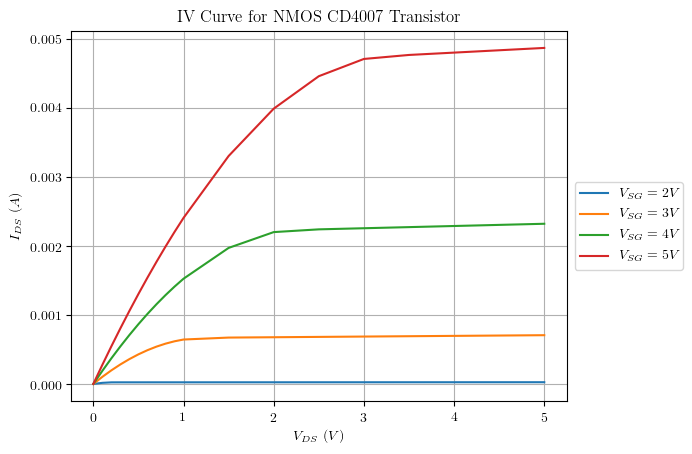

In [4]:
# part 1a

for i in range(2, 6):
    path = f'./part_1a/V_GS{i}.txt'
    voltage, current = read_data(path)

    plt.plot(voltage, current, label=f'$V_{{SG}} = {i}V$')
plt.legend(bbox_to_anchor=(1.01 , 0.6), loc='upper left', borderaxespad=0.2)
plt.title('IV Curve for NMOS CD4007 Transistor')
plt.xlabel('$V_{DS}\ (V)$')
plt.ylabel('$I_{DS}\ (A)$')
plt.grid()
plt.savefig("./figures/part_1_nmos.png", bbox_inches='tight')

            

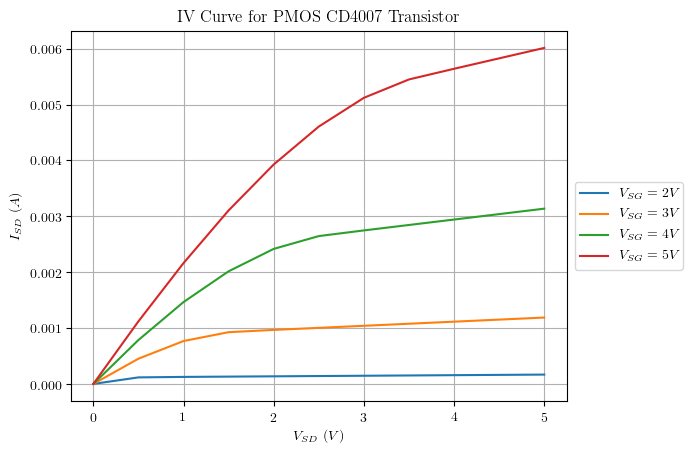

In [5]:
# part 1b

for i in range(2, 6):
    path = f'./part_1b/V_SG{i}.txt'
    voltage, current = read_data(path)
    v = 5 - voltage
    _i = current
    plt.plot(v, _i, label=f'$V_{{SG}} = {i}V$')
plt.title('IV Curve for PMOS CD4007 Transistor')
plt.legend(bbox_to_anchor=(1.01 , 0.6), loc='upper left', borderaxespad=0.2)
plt.xlabel('$V_{SD}\ (V)$')
plt.ylabel('$I_{SD}\ (A)$')
plt.grid()
plt.savefig("./figures/part_1_pmos.png", bbox_inches='tight')

k_n: 0.0008676001429410846
lambda: 0.015000148415798564
V_sat: 3.2299989641107034
-6.5070654548421585e-06 -0.00039176444211346087 0.0028023475629620014


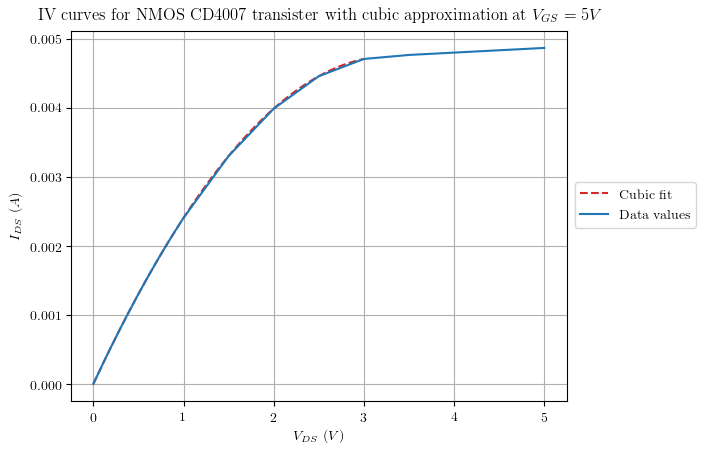

In [6]:
#part 1C NMOS
path = f'./part_1a/V_GS5.txt'
voltage, current = read_data(path)

get_values(voltage, current, 3)

plt.plot(voltage, current, label=f'Data values')

plt.title('IV curves for NMOS CD4007 transister with cubic approximation at $V_{GS} = 5V$')
plt.legend(bbox_to_anchor=(1.01 , 0.6), loc='upper left', borderaxespad=0.2)
plt.xlabel('$V_{DS}\ (V)$')
plt.ylabel('$I_{DS}\ (A)$')
plt.grid()
plt.savefig("./figures/part_1_ncube.png", bbox_inches='tight')



k_n: 0.0006400000018959622
lambda: 0.09000000581700336
V_sat: 3.5999999614157234
-2.880000194675938e-05 -0.00011263998915376797 0.002303999982131527


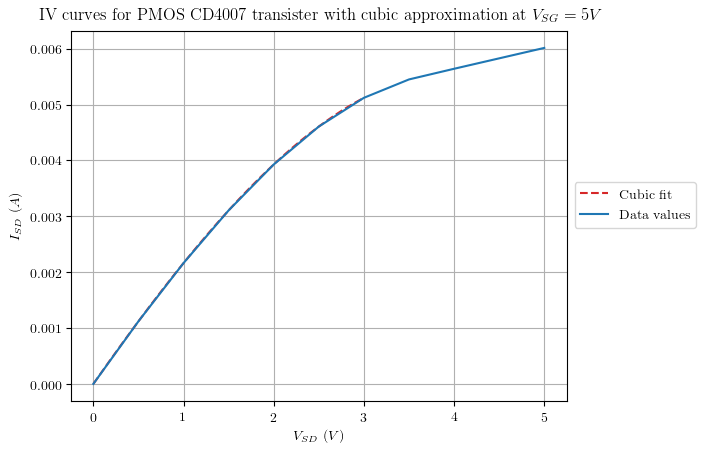

In [7]:
#part 1C pmos
path = f'./part_1b/V_SG5.txt'
voltage, current = read_data(path)
voltage = 5-voltage
get_values(voltage, current, 3, True)

plt.plot(voltage, current, label=f'Data values')

plt.title('IV curves for PMOS CD4007 transister with cubic approximation at $V_{SG} = 5V$')
plt.legend(bbox_to_anchor=(1.01 , 0.6), loc='upper left', borderaxespad=0.2)
plt.xlabel('$V_{SD}\ (V)$')
plt.ylabel('$I_{SD}\ (A)$')
plt.grid()
plt.savefig("./figures/part_1_pcube.png", bbox_inches='tight')

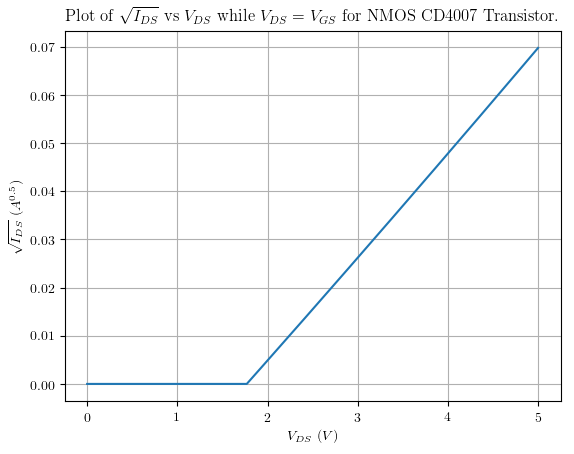

In [8]:
# part 1d NMOS


path = f'./part_1d_nmos.txt'
voltage, current = read_data(path)
plt.plot(voltage, np.sqrt(current), label=f'NMOS')
plt.xlabel('$V_{DS}\ (V)$')
plt.ylabel('$\sqrt{I_{DS}}\ (A^{0.5})$')
plt.grid()
plt.title('Plot of $\sqrt{I_{DS}}$ vs $V_{DS}$ while $V_{DS} = V_{GS}$ for NMOS CD4007 Transistor.')
plt.savefig("./figures/part_1_nsqrt.png", bbox_inches='tight')


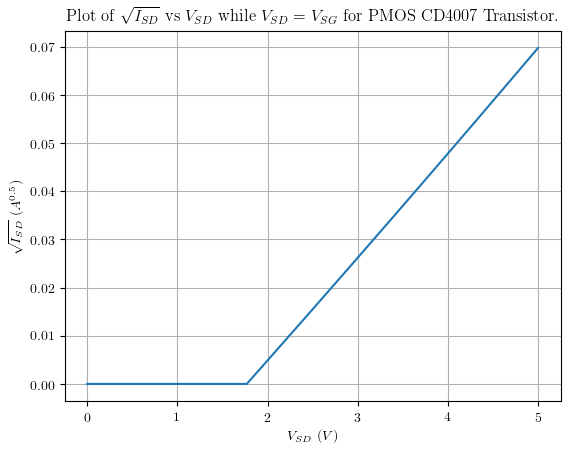

In [9]:
# part 1d PMOS


path = f'./part_1d_nmos.txt'
voltage, current = read_data(path)
plt.plot(voltage, np.sqrt(current), label=f'NMOS')
plt.xlabel('$V_{SD}\ (V)$')
plt.ylabel('$\sqrt{I_{SD}}\ (A^{0.5})$')
plt.grid()
plt.title('Plot of $\sqrt{I_{SD}}$ vs $V_{SD}$ while $V_{SD} = V_{SG}$ for PMOS CD4007 Transistor.')
plt.savefig("./figures/part_1_psqrt.png", bbox_inches='tight')

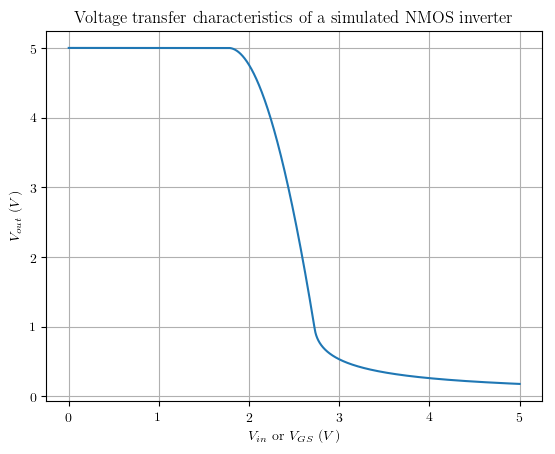

In [10]:
# part 2

path = './part_2_Vout.txt'
v_in, v_out = read_data(path)
plt.plot(v_in, v_out, label=f'{i}MOS')
#plt.legend(bbox_to_anchor=(1.01 , 0.6), loc='upper left', borderaxespad=0.2)
plt.title('Voltage transfer characteristics of a simulated NMOS inverter')
plt.xlabel('$V_{in}$ or $V_{GS}\ (V)$')
plt.ylabel('$V_{out}\ (V)$')
plt.grid()
plt.savefig("./figures/part_2_invert.png", bbox_inches='tight')

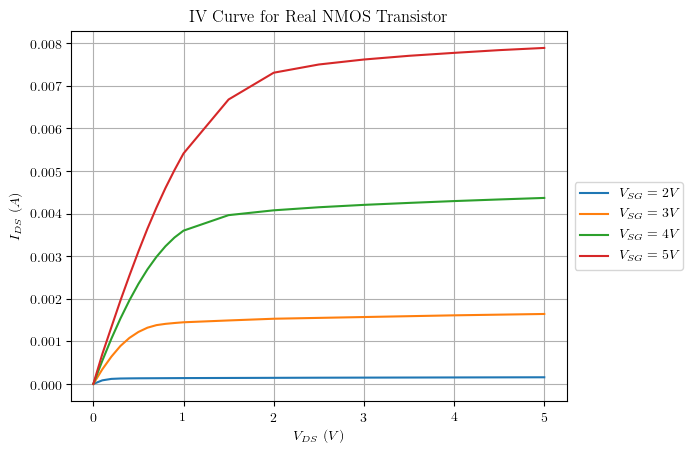

In [11]:
# Part 3 1a

for i in range(2, 6):
    path = f'./part_3/part1a_VGS{i}.txt'
    voltage, current = read_data(path)

    plt.plot(voltage, current*1E-3, label=f'$V_{{SG}} = {i}V$')
plt.legend(bbox_to_anchor=(1.01 , 0.6), loc='upper left', borderaxespad=0.2)
plt.title('IV Curve for Real NMOS Transistor')
plt.xlabel('$V_{DS}\ (V)$')
plt.ylabel('$I_{DS}\ (A)$')
plt.grid()
plt.savefig("./figures/part_3_nmos.png", bbox_inches='tight')

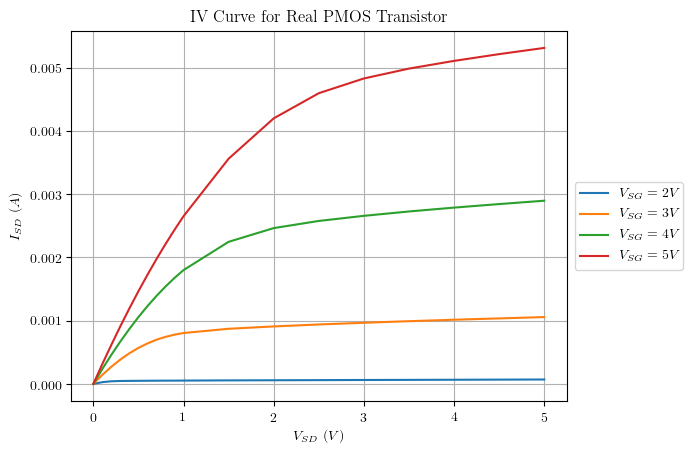

In [12]:
# part 3 1b

for i in range(2, 6):
    path = f'./part_3/part1b_VSG{i}.txt'
    voltage, current = read_data(path)
    v = 5 - voltage
    _i = current * 1E-3
    plt.plot(v, _i, label=f'$V_{{SG}} = {i}V$')
plt.title('IV Curve for Real PMOS Transistor')
plt.legend(bbox_to_anchor=(1.01 , 0.6), loc='upper left', borderaxespad=0.2)
plt.xlabel('$V_{SD}\ (V)$')
plt.ylabel('$I_{SD}\ (A)$')
plt.grid()
plt.savefig("./figures/part_3_pmos.png", bbox_inches='tight')

k_n: 0.004236487012128959
lambda: 0.1373253395676757
V_sat: 1.6198848229769365
-0.0002908885087573286 -0.001175831745035699 0.006862621013686609


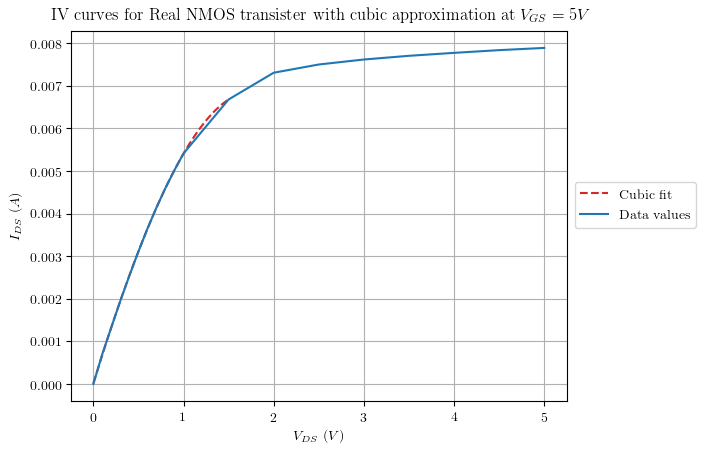

In [13]:
#part 3 1C NMOS
path = f'./part_3/part1a_VGS5.txt'
voltage, current = read_data(path)
current = current *1E-3
get_values(voltage, current, 1.5)

plt.plot(voltage, current, label=f'Data values')

plt.title('IV curves for Real NMOS transister with cubic approximation at $V_{GS} = 5V$')
plt.legend(bbox_to_anchor=(1.01 , 0.6), loc='upper left', borderaxespad=0.2)
plt.xlabel('$V_{DS}\ (V)$')
plt.ylabel('$I_{DS}\ (A)$')
plt.grid()
plt.savefig("./figures/part_3_ncube.png", bbox_inches='tight')

k_n: 0.0011490471535966608
lambda: 0.006424024774282691
V_sat: 2.7933519304637255
-3.6907536907619792e-06 -0.0005539044289044182 0.0032096930846930815


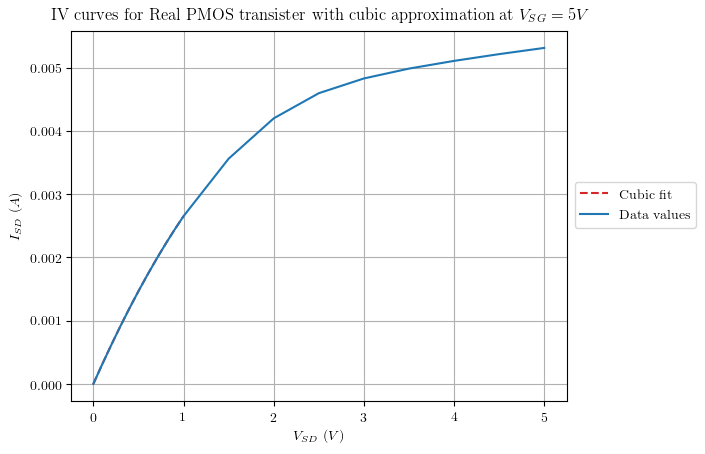

In [14]:
#part 3 1C pmos
path = f'./part_3/part1b_VSG5.txt'
voltage, current = read_data(path)
voltage = 5-voltage
current = current *1E-3
get_values(voltage, current, 1, True)

plt.plot(voltage, current, label=f'Data values')

plt.title('IV curves for Real PMOS transister with cubic approximation at $V_{SG} = 5V$')
plt.legend(bbox_to_anchor=(1.01 , 0.6), loc='upper left', borderaxespad=0.2)
plt.xlabel('$V_{SD}\ (V)$')
plt.ylabel('$I_{SD}\ (A)$')
plt.grid()
plt.savefig("./figures/part_3_pcube.png", bbox_inches='tight')

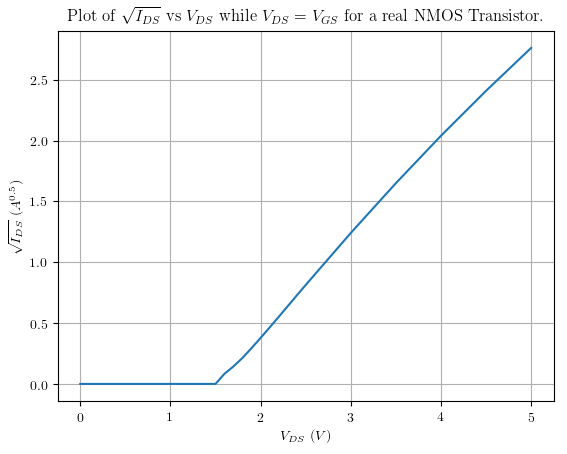

In [15]:
# part 1d NMOS


path = f'./part_3/part1d_nmos.txt'
voltage, current = read_data(path)
plt.plot(voltage, np.sqrt(current), label=f'NMOS')
plt.xlabel('$V_{DS}\ (V)$')
plt.ylabel('$\sqrt{I_{DS}}\ (A^{0.5})$')
plt.grid()
plt.title('Plot of $\sqrt{I_{DS}}$ vs $V_{DS}$ while $V_{DS} = V_{GS}$ for a real NMOS Transistor.')
plt.savefig("./figures/part_3_nsqrt.png", bbox_inches='tight')

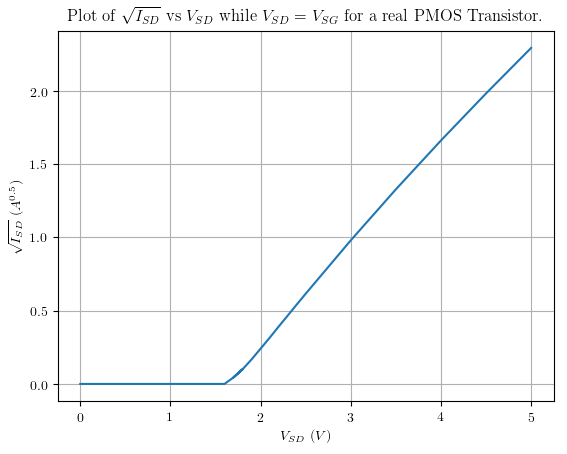

In [16]:
# part 1d PMOS

path = f'./part_3/part1d_pmos.txt'
voltage, current = read_data(path)
plt.plot(5-voltage, np.sqrt(current), label=f'NMOS')
plt.xlabel('$V_{SD}\ (V)$')
plt.ylabel('$\sqrt{I_{SD}}\ (A^{0.5})$')
plt.grid()
plt.title('Plot of $\sqrt{I_{SD}}$ vs $V_{SD}$ while $V_{SD} = V_{SG}$ for a real PMOS Transistor.')
plt.savefig("./figures/part_3_psqrt.png", bbox_inches='tight')

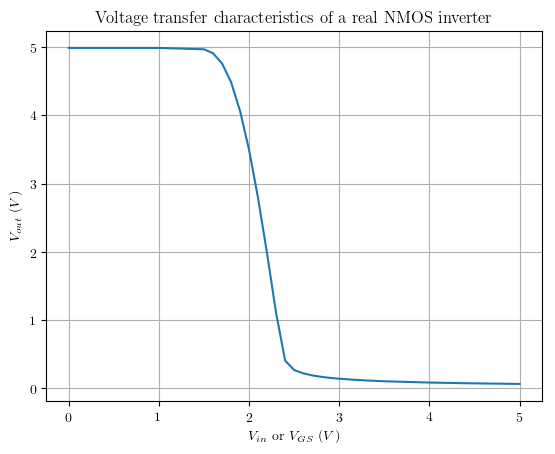

In [17]:
path = './part_3/nmos Inverter.txt'

v_in, v_out = read_data(path)
plt.plot(v_in, v_out, label=f'{i}MOS')
#plt.legend(bbox_to_anchor=(1.01 , 0.6), loc='upper left', borderaxespad=0.2)
plt.title('Voltage transfer characteristics of a real NMOS inverter')
plt.xlabel('$V_{in}$ or $V_{GS}\ (V)$')
plt.ylabel('$V_{out}\ (V)$')
plt.grid()
plt.savefig("./figures/part_3_invert.png", bbox_inches='tight')


